In [0]:
pip install seaborn

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
dbutils.fs.ls("/FileStore/tables/")

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/FaultDataset.csv', name='FaultDataset.csv', size=1703184, modificationTime=1680138049000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1678025512000),
 FileInfo(path='dbfs:/FileStore/tables/Pharma_DF/', name='Pharma_DF/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/Pharmacies/', name='Pharmacies/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1679491273000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/account-models_practice/', name='account-models_practice/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/acti

In [0]:
file = 'clinicaltrial_2021'

In [0]:
file2 = 'pharma'

In [0]:
mainpath = '/FileStore/tables/'

In [0]:
%python
dbutils.fs.rm(mainpath + file2 + '.csv', True)

Out[5]: False

In [0]:
dbutils.fs.rm(mainpath + file + '.csv', True)

Out[6]: False

In [0]:
dbutils.fs.cp(mainpath + file + '.zip', 'file:/tmp/')

Out[7]: True

In [0]:
dbutils.fs.cp(mainpath + file2 + '.zip', 'file:/tmp/')

Out[8]: True

In [0]:
%sh
ls /tmp/

Rserv
RtmpiQ4EIE
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2021.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.zip
systemd-private-70f2d0c5f9b14a9997704104e153502e-apache2.service-NCFPwj
systemd-private-70f2d0c5f9b14a9997704104e153502e-ntp.service-6D3kog
systemd-private-70f2d0c5f9b14a9997704104e153502e-systemd-logind.service-BnCJXe
systemd-private-70f2d0c5f9b14a9997704104e153502e-systemd-resolved.service-AItdyg
tmp.UlQbpU5r4N


In [0]:
import os
os.environ['file'] = file

In [0]:
import os
os.environ['file2'] = file2

In [0]:
%sh
unzip -d /tmp/ /tmp/$file

Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  


In [0]:
%sh
unzip -d /tmp/ /tmp/$file2

Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
dbutils.fs.mv('file:/tmp/' + file + '.csv', mainpath, True)

Out[14]: True

In [0]:
dbutils.fs.mv('file:/tmp/' + file2 + '.csv', mainpath, True)

Out[15]: True

In [0]:
dbutils.fs.head(mainpath + '/' + file + '.csv')

[Truncated to first 65536 bytes]
Out[16]: "Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions\r\nNCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||\r\nNCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|\r\nNCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|\r\nNCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|\r\nNCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|\r\nNCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate\r\nNCT02752438|Ankara University|Unk

In [0]:
rddD = sc.textFile(mainpath + '/' + file + '.csv')
rddD.take(10)

Out[17]: ['Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions',
 'NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|',
 'NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|',
 'NCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate',
 'NCT02752438|Ankara University|Unknown status|May 2016|Jul 

In [0]:
header = rddD.first()
noHeader = rddD.filter(lambda row: row != header)

In [0]:
rddD1 = noHeader.map(lambda x: x.split("|"))
rddD2 = rddD1.map(lambda v: [(v[0]) , v[1] , v[2], v[3], v[4],
                                v[5], v[6], v[7], v[8]])

In [0]:
from pyspark.sql.types import *

In [0]:
DF_Schema = StructType ([StructField("Id", StringType()) ,
                         StructField("Sponsor", StringType()) ,
                         StructField("Status", StringType()) ,
                         StructField("StartDate", StringType()) ,
                         StructField("CompletionDate", StringType()) ,
                         StructField("Type", StringType()) ,
                         StructField("Submission", StringType()) ,
                         StructField("Conditions", StringType()) ,
                         StructField("Interventions", StringType())])

In [0]:
clinicDF = spark.createDataFrame(rddD2 , DF_Schema)
clinicDF.show(5)

+-----------+--------------------+--------------------+---------+--------------+--------------------+----------+--------------------+-------------+
|         Id|             Sponsor|              Status|StartDate|CompletionDate|                Type|Submission|          Conditions|Interventions|
+-----------+--------------------+--------------------+---------+--------------+--------------------+----------+--------------------+-------------+
|NCT02758028|The University of...|          Recruiting| Aug 2005|      Nov 2021|      Interventional|  Apr 2016|                    |             |
|NCT02751957|     Duke University|           Completed| Jul 2016|      Jul 2020|      Interventional|  Apr 2016|Autistic Disorder...|             |
|NCT02758483|Universidade Fede...|           Completed| Mar 2017|      Jan 2018|      Interventional|  Apr 2016|   Diabetes Mellitus|             |
|NCT02759848|Istanbul Medeniye...|           Completed| Jan 2012|      Dec 2014|       Observational|  May 2016|

#Second method of creating data frames

In [0]:
clinicDFv2 = spark.read.options(delimiter ="|").csv(mainpath + '/' + file + '.csv', header = True)
clinicDFv2.show(5, truncate = False)

+-----------+--------------------------------------+----------------------+--------+----------+--------------------------------+----------+-------------------------------------------------+-------------+
|Id         |Sponsor                               |Status                |Start   |Completion|Type                            |Submission|Conditions                                       |Interventions|
+-----------+--------------------------------------+----------------------+--------+----------+--------------------------------+----------+-------------------------------------------------+-------------+
|NCT02758028|The University of Hong Kong           |Recruiting            |Aug 2005|Nov 2021  |Interventional                  |Apr 2016  |null                                             |null         |
|NCT02751957|Duke University                       |Completed             |Jul 2016|Jul 2020  |Interventional                  |Apr 2016  |Autistic Disorder,Autism Spectrum Disorder   

In [0]:
clinicDF.printSchema()

clinicDFv2.printSchema()

root
 |-- Id: string (nullable = true)
 |-- Sponsor: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- StartDate: string (nullable = true)
 |-- CompletionDate: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Submission: string (nullable = true)
 |-- Conditions: string (nullable = true)
 |-- Interventions: string (nullable = true)

root
 |-- Id: string (nullable = true)
 |-- Sponsor: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Start: string (nullable = true)
 |-- Completion: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Submission: string (nullable = true)
 |-- Conditions: string (nullable = true)
 |-- Interventions: string (nullable = true)



#Question 1 Answer

In [0]:
import pyspark	

from pyspark.sql import SparkSession	

from pyspark.sql.functions import countDistinct

In [0]:
countDF = clinicDF.select(countDistinct("Id", "Type"))	

countDF.show()	

+------------------------+
|count(DISTINCT Id, Type)|
+------------------------+
|                  387261|
+------------------------+



#Question 2 Answer

In [0]:
typeDF = clinicDF.select('Id','Type')
typeDF.show(5)

+-----------+--------------------+
|         Id|                Type|
+-----------+--------------------+
|NCT02758028|      Interventional|
|NCT02751957|      Interventional|
|NCT02758483|      Interventional|
|NCT02759848|       Observational|
|NCT02758860|Observational [Pa...|
+-----------+--------------------+
only showing top 5 rows



In [0]:
typeDF2 = typeDF.groupBy("Type").count().sort('count', ascending=False)
typeDF2.show(truncate=False)

+--------------------------------+------+
|Type                            |count |
+--------------------------------+------+
|Interventional                  |301472|
|Observational                   |77540 |
|Observational [Patient Registry]|8180  |
|Expanded Access                 |69    |
+--------------------------------+------+



In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [0]:
typeDF3 = typeDF2.toPandas()
typeDF3

,Type,count
0,Interventional,301472
1,Observational,77540
2,Observational [Patient Registry],8180
3,Expanded Access,69


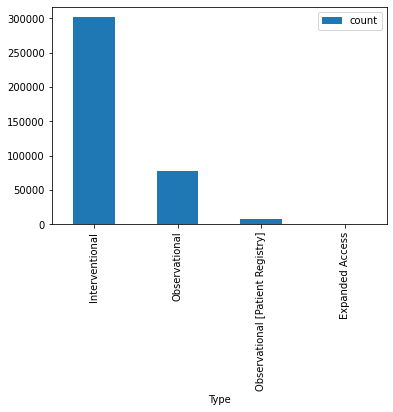

In [0]:
typeDF3.plot(kind="bar", x="Type", y="count")
plt.show()

#Question 3 Answer

In [0]:
conditionDF = clinicDF.select('Id','Conditions')
conditionDF.show(5)

+-----------+--------------------+
|         Id|          Conditions|
+-----------+--------------------+
|NCT02758028|                    |
|NCT02751957|Autistic Disorder...|
|NCT02758483|   Diabetes Mellitus|
|NCT02759848|Tuberculosis,Lung...|
|NCT02758860|Diverticular Dise...|
+-----------+--------------------+
only showing top 5 rows



In [0]:
conditionDF2 = conditionDF.filter(conditionDF.Conditions != '')
conditionDF2.show(10, truncate = False)

+-----------+-------------------------------------------------+
|Id         |Conditions                                       |
+-----------+-------------------------------------------------+
|NCT02751957|Autistic Disorder,Autism Spectrum Disorder       |
|NCT02758483|Diabetes Mellitus                                |
|NCT02759848|Tuberculosis,Lung Diseases,Pulmonary Disease     |
|NCT02758860|Diverticular Diseases,Diverticulum,Diverticulosis|
|NCT02757209|Asthma                                           |
|NCT02752438|Hypoventilation                                  |
|NCT02753543|Lymphoma                                         |
|NCT02753530|Myositis                                         |
|NCT02754817|Diabetes Mellitus                                |
|NCT02759276|Hypertension                                     |
+-----------+-------------------------------------------------+
only showing top 10 rows



In [0]:
from pyspark.sql.functions import *

In [0]:
from pyspark.sql.functions import explode

In [0]:
splitConDF = split(conditionDF2['Conditions'], ',')

In [0]:
conditionDF3 = conditionDF2.select("Id", explode(splitConDF))
conditionDF3.show(5, truncate = False)

+-----------+------------------------+
|Id         |col                     |
+-----------+------------------------+
|NCT02751957|Autistic Disorder       |
|NCT02751957|Autism Spectrum Disorder|
|NCT02758483|Diabetes Mellitus       |
|NCT02759848|Tuberculosis            |
|NCT02759848|Lung Diseases           |
+-----------+------------------------+
only showing top 5 rows



In [0]:
conditionDF4 = conditionDF3.groupBy("col").count().sort('count', ascending=False)
conditionDF4.show(10, truncate=False)

+-----------------+-----+
|col              |count|
+-----------------+-----+
|Carcinoma        |13389|
|Diabetes Mellitus|11080|
|Neoplasms        |9371 |
|Breast Neoplasms |8640 |
|Syndrome         |8032 |
|Leukemia         |5904 |
|Lung Neoplasms   |5598 |
|COVID-19         |5567 |
|Lymphoma         |5395 |
|Hypertension     |5364 |
+-----------------+-----+
only showing top 10 rows



In [0]:
conditionDF5 = conditionDF4.withColumnRenamed("col","Conditions").show(5, truncate = False)

+-----------------+-----+
|Conditions       |count|
+-----------------+-----+
|Carcinoma        |13389|
|Diabetes Mellitus|11080|
|Neoplasms        |9371 |
|Breast Neoplasms |8640 |
|Syndrome         |8032 |
+-----------------+-----+
only showing top 5 rows



In [0]:
conditionPD = conditionDF4.toPandas()
conditionPD.head(5)

,col,count
0,Carcinoma,13389
1,Diabetes Mellitus,11080
2,Neoplasms,9371
3,Breast Neoplasms,8640
4,Syndrome,8032


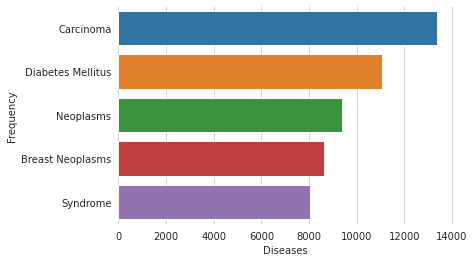

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.barplot(x='count', y='col', data=conditionPD.head(5))
plt.xlabel('Diseases')
plt.ylabel('Frequency')
sns.despine(left=True, bottom=True)

#Question 4 Answer

In [0]:
dbutils.fs.head(mainpath + '/' + file2 + '.csv')

[Truncated to first 65536 bytes]
Out[42]: '"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"\n"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to in

In [0]:
rddPharm = sc.textFile(mainpath + '/' + file2 + '.csv')
rddPharm.take(5)

Out[43]: ['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"',
 '"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the c

In [0]:
pharmDF = spark.read.options(delimiter =",").csv(mainpath + '/' + file2 + '.csv', header = True)
pharmDF.show(5, truncate = False)

+-------------------------------------+-------------------+--------------+------------------------+---------------------------------------------------------+------------+------------+---------------------------------------+-----------------------------------------------------+------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------+-------------+-------------------

In [0]:
spons = clinicDF.select('Sponsor')
spons.show(5)

+--------------------+
|             Sponsor|
+--------------------+
|The University of...|
|     Duke University|
|Universidade Fede...|
|Istanbul Medeniye...|
|University of Rom...|
+--------------------+
only showing top 5 rows



In [0]:
pharmDF2 = pharmDF.select('Parent_Company')
pharmDF2.show(5)

+-------------------+
|     Parent_Company|
+-------------------+
|Abbott Laboratories|
|             AbbVie|
|             AbbVie|
|Abbott Laboratories|
|  Johnson & Johnson|
+-------------------+
only showing top 5 rows



In [0]:
pharmDF3 = pharmDF2.agg(collect_list("Parent_Company")).first()[0]

In [0]:
nonPharm = spons.filter(~col('Sponsor').isin(pharmDF3))
nonPharm.show()

+--------------------+
|             Sponsor|
+--------------------+
|The University of...|
|     Duke University|
|Universidade Fede...|
|Istanbul Medeniye...|
|University of Rom...|
|Consorzio Futuro ...|
|   Ankara University|
|     Ruijin Hospital|
|Washington Univer...|
|           Orphazyme|
|    Novo Nordisk A/S|
|Daniel Alexandre ...|
|Bulent Ecevit Uni...|
|Institut für Phar...|
|The Third Xiangya...|
|Tel Aviv Medical ...|
|Medicines for Mal...|
|James Cook Univer...|
|Soonchunhyang Uni...|
|Member Companies ...|
+--------------------+
only showing top 20 rows



In [0]:
nonPharm2 = nonPharm.groupBy("Sponsor").count().sort('count', ascending=False)
nonPharm2.show(10)

+--------------------+-----+
|             Sponsor|count|
+--------------------+-----+
|National Cancer I...| 3218|
|M.D. Anderson Can...| 2414|
|Assistance Publiq...| 2369|
|         Mayo Clinic| 2300|
|Merck Sharp & Doh...| 2243|
|   Assiut University| 2154|
|Novartis Pharmace...| 2088|
|Massachusetts Gen...| 1971|
|    Cairo University| 1928|
|   Hoffmann-La Roche| 1828|
+--------------------+-----+
only showing top 10 rows



In [0]:
nonPharm3 = nonPharm2.toPandas()

In [0]:
nonPharm3

,Sponsor,count
0,National Cancer Institute (NCI),3218
1,M.D. Anderson Cancer Center,2414
2,Assistance Publique - Hôpitaux de Paris,2369
3,Mayo Clinic,2300
4,Merck Sharp & Dohme Corp.,2243
...,...,...
34416,Hôpital Militaire De Rabat,1
34417,Bayfront Health St Petersburg,1
34418,H.K.E.S's S.Nijalingappa Institute of Dental S...,1
34419,"Organisation for Rural Community Development, ...",1


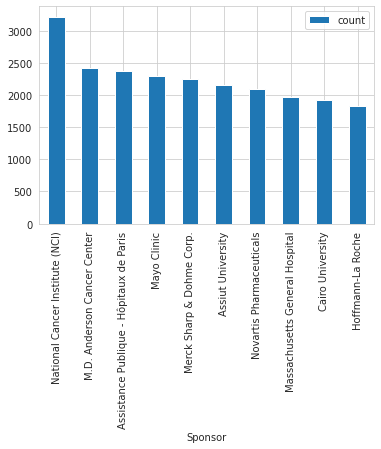

In [0]:
nonPharm3.head(10).plot(kind="bar", x="Sponsor", y="count")
plt.show()

#Question 5 answer

In [0]:
from pyspark.sql.functions import to_date, date_format

In [0]:
from pyspark.sql.functions import year

In [0]:
from pyspark.sql.functions import col

In [0]:
studies = clinicDF.withColumn('CompletionDate', to_date('CompletionDate', 'MMM yyyy'))
studies.show()

+-----------+--------------------+--------------------+---------+--------------+--------------------+----------+--------------------+--------------------+
|         Id|             Sponsor|              Status|StartDate|CompletionDate|                Type|Submission|          Conditions|       Interventions|
+-----------+--------------------+--------------------+---------+--------------+--------------------+----------+--------------------+--------------------+
|NCT02758028|The University of...|          Recruiting| Aug 2005|    2021-11-01|      Interventional|  Apr 2016|                    |                    |
|NCT02751957|     Duke University|           Completed| Jul 2016|    2020-07-01|      Interventional|  Apr 2016|Autistic Disorder...|                    |
|NCT02758483|Universidade Fede...|           Completed| Mar 2017|    2018-01-01|      Interventional|  Apr 2016|   Diabetes Mellitus|                    |
|NCT02759848|Istanbul Medeniye...|           Completed| Jan 2012|    2

In [0]:
studies2 = studies \
    .filter(studies.Status == "Completed")

In [0]:
studies3 = studies2.filter(year(studies2.CompletionDate) == 2021)

In [0]:
studies3.show()

+-----------+--------------------+---------+---------+--------------+--------------------+----------+--------------------+--------------------+
|         Id|             Sponsor|   Status|StartDate|CompletionDate|                Type|Submission|          Conditions|       Interventions|
+-----------+--------------------+---------+---------+--------------+--------------------+----------+--------------------+--------------------+
|NCT02753530|           Orphazyme|Completed| Aug 2017|    2021-01-01|      Interventional|  Apr 2016|            Myositis|                    |
|NCT02758704|St. Justine's Hos...|Completed| Oct 2015|    2021-06-01|      Interventional|  Apr 2016|                    |                    |
|NCT02754778|Martin-Luther-Uni...|Completed| Apr 2016|    2021-03-01|      Interventional|  Apr 2016|Pre-Eclampsia,HEL...|                    |
|NCT02758782|Charite Universit...|Completed| Sep 2016|    2021-01-01|      Interventional|  Apr 2016|         Spondylitis| Celecoxib,Gol

In [0]:
studies4 = studies3.withColumn('CompletionDate', date_format('CompletionDate', 'MMM'))

In [0]:
studies4.show()

+-----------+--------------------+---------+---------+--------------+--------------------+----------+--------------------+--------------------+
|         Id|             Sponsor|   Status|StartDate|CompletionDate|                Type|Submission|          Conditions|       Interventions|
+-----------+--------------------+---------+---------+--------------+--------------------+----------+--------------------+--------------------+
|NCT02753530|           Orphazyme|Completed| Aug 2017|           Jan|      Interventional|  Apr 2016|            Myositis|                    |
|NCT02758704|St. Justine's Hos...|Completed| Oct 2015|           Jun|      Interventional|  Apr 2016|                    |                    |
|NCT02754778|Martin-Luther-Uni...|Completed| Apr 2016|           Mar|      Interventional|  Apr 2016|Pre-Eclampsia,HEL...|                    |
|NCT02758782|Charite Universit...|Completed| Sep 2016|           Jan|      Interventional|  Apr 2016|         Spondylitis| Celecoxib,Gol

In [0]:
studies5 = studies4.select('CompletionDate').groupBy("CompletionDate").count()

In [0]:
studies5.show()

+--------------+-----+
|CompletionDate|count|
+--------------+-----+
|           Oct|  187|
|           Sep|  528|
|           Aug|  700|
|           May|  984|
|           Jun| 1094|
|           Feb|  934|
|           Mar| 1227|
|           Jan| 1131|
|           Apr|  967|
|           Jul|  819|
+--------------+-----+



In [0]:
months_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [0]:
month_df = spark.createDataFrame(list(months_dict.items()), schema=['month', 'sort_value'])
month_df.show()

+-----+----------+
|month|sort_value|
+-----+----------+
|  Jan|         1|
|  Feb|         2|
|  Mar|         3|
|  Apr|         4|
|  May|         5|
|  Jun|         6|
|  Jul|         7|
|  Aug|         8|
|  Sep|         9|
|  Oct|        10|
|  Nov|        11|
|  Dec|        12|
+-----+----------+



In [0]:
studies7 = studies5.withColumnRenamed('CompletionDate', 'month')

In [0]:
studies7.show()

+-----+-----+
|month|count|
+-----+-----+
|  Oct|  187|
|  Sep|  528|
|  Aug|  700|
|  May|  984|
|  Jun| 1094|
|  Feb|  934|
|  Mar| 1227|
|  Jan| 1131|
|  Apr|  967|
|  Jul|  819|
+-----+-----+



In [0]:
studies8 = studies7.join(month_df, on='month')

In [0]:
studies8.show(12)

+-----+-----+----------+
|month|count|sort_value|
+-----+-----+----------+
|  Jan| 1131|         1|
|  Feb|  934|         2|
|  Mar| 1227|         3|
|  Apr|  967|         4|
|  May|  984|         5|
|  Jun| 1094|         6|
|  Jul|  819|         7|
|  Sep|  528|         9|
|  Aug|  700|         8|
|  Oct|  187|        10|
+-----+-----+----------+



In [0]:
studies9 = studies8.orderBy(col('sort_value'))

In [0]:
studies9.show()

+-----+-----+----------+
|month|count|sort_value|
+-----+-----+----------+
|  Jan| 1131|         1|
|  Feb|  934|         2|
|  Mar| 1227|         3|
|  Apr|  967|         4|
|  May|  984|         5|
|  Jun| 1094|         6|
|  Jul|  819|         7|
|  Aug|  700|         8|
|  Sep|  528|         9|
|  Oct|  187|        10|
+-----+-----+----------+



In [0]:
studiesPerMonth = studies9.select('month', 'count')

In [0]:
studiesPerMonth.show()

+-----+-----+
|month|count|
+-----+-----+
|  Jan| 1131|
|  Feb|  934|
|  Mar| 1227|
|  Apr|  967|
|  May|  984|
|  Jun| 1094|
|  Jul|  819|
|  Aug|  700|
|  Sep|  528|
|  Oct|  187|
+-----+-----+



In [0]:
studiesPerMonth2 = studiesPerMonth.toPandas()
studiesPerMonth2

,month,count
0,Jan,1131
1,Feb,934
2,Mar,1227
3,Apr,967
4,May,984
5,Jun,1094
6,Jul,819
7,Aug,700
8,Sep,528
9,Oct,187


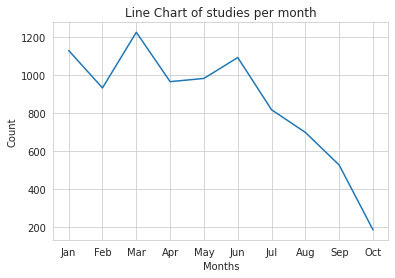

In [0]:
import seaborn as sns

sns.lineplot(x="month", y=studiesPerMonth2["count"], data=studiesPerMonth2)

plt.xlabel("Months")
plt.ylabel("Count")
plt.title("Line Chart of studies per month")

plt.show()

PROBLEM STATEMENT:
which country pharmacy HQ has commited most government contracting related offenses?

In [0]:
from pyspark.sql.functions import regexp_replace

In [0]:
from pyspark.sql.functions import sum, count

In [0]:
HQDF = pharmDF.select('Parent_Company', 'Penalty_Amount', 'Offense_Group', 'Primary_Offense', 'Secondary_Offense', 'HQ_Country_of_Parent')
HQDF.show(5, truncate = False)

+-------------------+--------------+---------------------------------------+-----------------------------------------------------+------------------------+--------------------+
|Parent_Company     |Penalty_Amount|Offense_Group                          |Primary_Offense                                      |Secondary_Offense       |HQ_Country_of_Parent|
+-------------------+--------------+---------------------------------------+-----------------------------------------------------+------------------------+--------------------+
|Abbott Laboratories|$5,475,000    |government-contracting-related offenses|False Claims Act and related                         |kickbacks and bribery   |USA                 |
|AbbVie             |$1,500,000,000|healthcare-related offenses            |off-label or unapproved promotion of medical products|null                    |USA                 |
|AbbVie             |$126,500,000  |government-contracting-related offenses|False Claims Act and related           

In [0]:
HQDF_Clean = HQDF.withColumn("Penalty_Amount", regexp_replace(HQDF.Penalty_Amount, "[$,]", ""))
HQDF_Clean.show()

+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+
|      Parent_Company|Penalty_Amount|       Offense_Group|     Primary_Offense|   Secondary_Offense|HQ_Country_of_Parent|
+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+
| Abbott Laboratories|       5475000|government-contra...|False Claims Act ...|kickbacks and bri...|                 USA|
|              AbbVie|    1500000000|healthcare-relate...|off-label or unap...|                null|                 USA|
|              AbbVie|     126500000|government-contra...|False Claims Act ...|                null|                 USA|
| Abbott Laboratories|         49045|employment-relate...|wage and hour vio...|Fair Labor Standa...|                 USA|
|   Johnson & Johnson|      18000000|government-contra...|False Claims Act ...|                null|                 USA|
| Abbott Laboratories|  

In [0]:
HQDF2 = HQDF_Clean.filter(HQDF.Offense_Group == "government-contracting-related offenses")
HQDF2.show()

+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+
|      Parent_Company|Penalty_Amount|       Offense_Group|     Primary_Offense|   Secondary_Offense|HQ_Country_of_Parent|
+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+
| Abbott Laboratories|       5475000|government-contra...|False Claims Act ...|kickbacks and bri...|                 USA|
|              AbbVie|     126500000|government-contra...|False Claims Act ...|                null|                 USA|
|   Johnson & Johnson|      18000000|government-contra...|False Claims Act ...|                null|                 USA|
|              Pfizer|      42500000|government-contra...|False Claims Act ...|kickbacks and bri...|                 USA|
|               Amgen|      24900000|government-contra...|False Claims Act ...|kickbacks and bri...|                 USA|
|     Astellas Pharma|  

In [0]:
HQDF3 = HQDF2.select('HQ_Country_of_Parent', 'Offense_Group', 'Penalty_Amount')
HQDF3.show()

+--------------------+--------------------+--------------+
|HQ_Country_of_Parent|       Offense_Group|Penalty_Amount|
+--------------------+--------------------+--------------+
|                 USA|government-contra...|       5475000|
|                 USA|government-contra...|     126500000|
|                 USA|government-contra...|      18000000|
|                 USA|government-contra...|      42500000|
|                 USA|government-contra...|      24900000|
|               Japan|government-contra...|       7300000|
|      United Kingdom|government-contra...|      46500000|
|      United Kingdom|government-contra...|       7900000|
|      United Kingdom|government-contra...|       2600000|
|      United Kingdom|government-contra...|     354900000|
|              France|government-contra...|      95500000|
|              France|government-contra...|     190000000|
|              Israel|government-contra...|       7500000|
|               Japan|government-contra...|      3900000

In [0]:
HQDF4 = HQDF3.groupBy('HQ_Country_of_Parent').agg(sum('Penalty_Amount').alias("Penalty_Amount"), count("HQ_Country_of_Parent").alias("HQ_Country_count"))
HQDF4.show(truncate = False)

+--------------------+--------------+----------------+
|HQ_Country_of_Parent|Penalty_Amount|HQ_Country_count|
+--------------------+--------------+----------------+
|Germany             |1.18014E8     |10              |
|France              |5.62384015E8  |15              |
|Belgium             |3.5106164E7   |3               |
|India               |4.3625E7      |3               |
|Denmark             |1.16295963E8  |4               |
|Ireland             |3.13880667E8  |14              |
|Israel              |3.19813333E8  |16              |
|USA                 |8.842630928E9 |146             |
|Switzerland         |7.77174307E8  |13              |
|Canada              |3.77E7        |3               |
|Japan               |1.694075245E9 |22              |
|United Kingdom      |1.330454375E9 |32              |
+--------------------+--------------+----------------+



In [0]:
HQDF5 = HQDF4.orderBy('HQ_Country_count', ascending=False)
HQDF5.show(10)

+--------------------+--------------+----------------+
|HQ_Country_of_Parent|Penalty_Amount|HQ_Country_count|
+--------------------+--------------+----------------+
|                 USA| 8.842630928E9|             146|
|      United Kingdom| 1.330454375E9|              32|
|               Japan| 1.694075245E9|              22|
|              Israel|  3.19813333E8|              16|
|              France|  5.62384015E8|              15|
|             Ireland|  3.13880667E8|              14|
|         Switzerland|  7.77174307E8|              13|
|             Germany|     1.18014E8|              10|
|             Denmark|  1.16295963E8|               4|
|             Belgium|   3.5106164E7|               3|
+--------------------+--------------+----------------+
only showing top 10 rows



In [0]:
HQDF5_pd = HQDF5.toPandas()

In [0]:
Penalty_Amount_min = HQDF5_pd['Penalty_Amount'].min()
Penalty_Amount_max = HQDF5_pd['Penalty_Amount'].max()
HQDF5_pd['Penalty_Amount_scaled'] = (HQDF5_pd['Penalty_Amount'] - Penalty_Amount_min) / (Penalty_Amount_max - Penalty_Amount_min)

Out[86]: <AxesSubplot:xlabel='HQ_Country_of_Parent'>

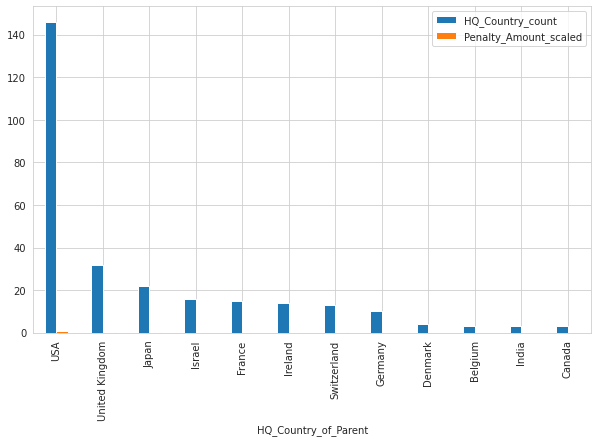

In [0]:
HQDF5_pd.plot(kind='bar', x='HQ_Country_of_Parent', y=['HQ_Country_count', 'Penalty_Amount_scaled'], figsize=(10, 6))

Out[87]: <AxesSubplot:>

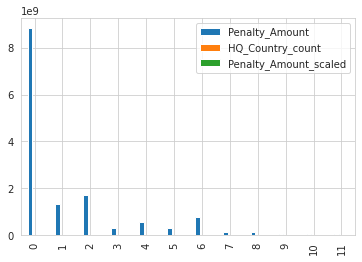

In [0]:
HQDF5_pd.plot(kind="bar")

In [0]:
%python
dbutils.fs.rm(mainpath + file + '.csv', True)

Out[88]: True

In [0]:
%python
dbutils.fs.rm(mainpath + file2 + '.csv', True)

Out[89]: True